## Importação da base de dados bruta

In [98]:
import pandas as pd
import holidays
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

In [34]:
df = pd.read_excel(r"D:\Dissertação\dissertacao_pgmc\Dados\Dados brutos\Base de dados TCC_anonimizada.xlsx", header= 0, sheet_name="Dados", engine= 'openpyxl')
df.sort_values("REAL - Entrada").head(15)


,BRM,agrup_veiculo,tipo_expedicao,int_tipo_expedicao,ponto_descarga,peso,bin_varricao,REAL - Entrada,Data_entrada,qtd_veiculos_dia,qtd_veiculos_dentro,OUTLIER,Quinzena,REAL - Saída,tempo_varricao,dia_semana,semana_mes,tpv_usina,num_mes,Previsto - Permanência
1721,209005,1.0,08,NaN,PONTO5,41770,0,2021-01-02 05:34:02.381,2021-01-02,12,0,0,1,2021-01-02 07:47:23.458,0.00,6,1,2.22,1,4.40
1948,209006,1.0,75,75.0,PONTO3,52280,1,2021-01-02 05:50:05.901,2021-01-02,12,1,0,1,2021-01-02 08:49:18.965,0.79,6,1,2.99,1,4.52
1823,209025,1.0,12,12.0,PONTO1,45260,1,2021-01-02 09:24:14.942,2021-01-02,12,0,0,1,2021-01-02 12:07:02.519,0.50,6,1,2.71,1,4.40
2626,209035,7.0,57,57.0,PONTO8,32530,0,2021-01-02 11:36:03.375,2021-01-02,12,1,0,1,2021-01-02 13:06:51.874,0.00,6,1,1.51,1,4.40
2270,209029,8.0,35,35.0,DEDICADOS,48060,1,2021-01-02 11:39:07.109,2021-01-02,12,2,0,1,2021-01-02 14:28:49.136,0.47,6,1,2.83,1,4.40
2224,209034,8.0,35,35.0,PONTO3,38870,1,2021-01-02 13:10:31.831,2021-01-02,12,1,0,1,2021-01-02 14:54:07.719,0.60,6,1,1.73,1,4.40
838,209036,7.0,55,55.0,GUSA BÁSC,72770,0,2021-01-02 13:16:39.456,2021-01-02,12,2,0,1,2021-01-02 14:22:55.215,0.00,6,1,1.10,1,4.73
2846,209037,7.0,57,57.0,DEDICADOS,38390,0,2021-01-02 13:57:39.006,2021-01-02,12,3,0,1,2021-01-02 15:53:29.697,0.00,6,1,1.93,1,4.40
2941,209039,7.0,55,55.0,PONTO6,47770,1,2021-01-02 14:20:23.780,2021-01-02,12,4,0,1,2021-01-02 17:16:45.876,0.46,6,1,2.94,1,4.40
2842,209038,1.0,12,12.0,PONTO1,54630,1,2021-01-02 14:31:20.805,2021-01-02,12,3,0,1,2021-01-02 18:03:34.980,0.00,6,1,3.54,1,4.55


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23974 entries, 0 to 23973
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BRM                     23974 non-null  int64         
 1   agrup_veiculo           23475 non-null  float64       
 2   tipo_expedicao          23900 non-null  object        
 3   int_tipo_expedicao      21884 non-null  float64       
 4   ponto_descarga          23902 non-null  object        
 5   peso                    23974 non-null  int64         
 6   bin_varricao            23974 non-null  int64         
 7   REAL - Entrada          23974 non-null  datetime64[ns]
 8   Data_entrada            23974 non-null  datetime64[ns]
 9   qtd_veiculos_dia        23974 non-null  int64         
 10  qtd_veiculos_dentro     23974 non-null  int64         
 11  OUTLIER                 23974 non-null  int64         
 12  Quinzena                23974 non-null  int64 

In [36]:
df['REAL - Saída'].min()

Timestamp('2021-01-02 07:47:23.458000')

In [37]:
df['REAL - Saída'].max()

Timestamp('2021-09-30 23:04:59.003000')

## Criação do novo dataframe

### Agrupando a saída em intervalos de 30 minutos

In [38]:
df_novo = pd.DataFrame(df.groupby(pd.Grouper(key='REAL - Saída', freq='30T'))['tpv_usina'].mean())
df_novo.reset_index(inplace=True)
df_novo['Dia'] = pd.to_datetime(df_novo['REAL - Saída'].dt.strftime('%Y-%m-%d'))

### Criando a média acumulada do TPV

In [39]:
tpv_media_acum = df_novo.dropna().groupby('Dia')['tpv_usina'].cumsum() / df_novo.dropna().groupby('Dia').cumcount().add(1)
df_novo['tpv_media_acum'] = tpv_media_acum
df_novo['tpv_media_acum'].fillna(0, inplace=True)

### Garantindo que cada janela do dia receba o valor do indicador

In [40]:
df_novo = df_novo.groupby(pd.Grouper(key='Dia', freq='D')).ffill()
df_novo.set_index("REAL - Saída", inplace= True)


In [41]:
df_novo.head(20)

,tpv_usina,tpv_media_acum
REAL - Saída,,
2021-01-02 07:30:00,2.220,2.220000
2021-01-02 08:00:00,2.220,0.000000
2021-01-02 08:30:00,2.990,2.605000
2021-01-02 09:00:00,2.990,0.000000
2021-01-02 09:30:00,2.990,0.000000
2021-01-02 10:00:00,2.990,0.000000
2021-01-02 10:30:00,2.990,0.000000
2021-01-02 11:00:00,2.990,0.000000
2021-01-02 11:30:00,2.990,0.000000


## Enriquecimento da base

### Feriados

In [42]:
feriados = holidays.Brazil()

In [43]:

def is_feriado(data):
  """Verifica se a data é feriado no Brasil."""
  return data.date() in feriados 

# Criando a coluna de feriados e preenchendo com falsos
df_novo['feriado'] = False

# Aplicando a funcao para receber True caso seja feriado
for index, row in df_novo.iterrows():

  data = row.name
  df_novo.at[index, 'feriado'] = is_feriado(data)

In [44]:
def enriqueceDatetime(data):
    data['dia_semana'] = data.index.weekday
    data['mes'] = data.index.month
    data['hora'] = data.index.hour
    

    #Monday is 0 and Sunday is 6


enriqueceDatetime(df_novo)

In [46]:
df_novo.head(5)

,tpv_usina,tpv_media_acum,feriado,dia_semana,mes,hora
REAL - Saída,,,,,,
2021-01-02 07:30:00,2.22,2.220,False,5,1,7
2021-01-02 08:00:00,2.22,0.000,False,5,1,8
2021-01-02 08:30:00,2.99,2.605,False,5,1,8
2021-01-02 09:00:00,2.99,0.000,False,5,1,9
2021-01-02 09:30:00,2.99,0.000,False,5,1,9


### Fim de semana

In [47]:
def fim_de_semana(data):

    dia = data.weekday()

    return dia >= 5

In [48]:
# Aplicando a funcao para receber True caso seja fim de semana
for index, row in df_novo.iterrows():

  data = row.name
  df_novo.at[index, 'fim_semana'] = fim_de_semana(data)

C:\Users\thevh\AppData\Local\Temp/ipykernel_28220/3152377570.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_novo.at[index, 'fim_semana'] = fim_de_semana(data)


In [49]:
df_novo.head(5)


,tpv_usina,tpv_media_acum,feriado,dia_semana,mes,hora,fim_semana
REAL - Saída,,,,,,,
2021-01-02 07:30:00,2.22,2.220,False,5,1,7,True
2021-01-02 08:00:00,2.22,0.000,False,5,1,8,True
2021-01-02 08:30:00,2.99,2.605,False,5,1,8,True
2021-01-02 09:00:00,2.99,0.000,False,5,1,9,True
2021-01-02 09:30:00,2.99,0.000,False,5,1,9,True


### Quinzena

In [50]:
def primeira_quinzena(data):

    dia = data.day

    return dia < 15

In [51]:
# Aplicando a funcao para receber True caso seja primeira quinzena
for index, row in df_novo.iterrows():

  data = row.name
  df_novo.at[index, 'primeira_quinzena'] = primeira_quinzena(data)

C:\Users\thevh\AppData\Local\Temp/ipykernel_28220/2020051742.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_novo.at[index, 'primeira_quinzena'] = primeira_quinzena(data)


### Quantidade de veículos dentro da usina

In [52]:
def calculaQtdVeiculosUsina(df):

    entrada = df.groupby(pd.Grouper(key='REAL - Entrada', freq='30T'))['BRM'].count()
    saida = df.groupby(pd.Grouper(key='REAL - Saída', freq='30T'))['BRM'].count()

    # Criar DataFrame teste com os resultados agrupados
    df_aux = pd.DataFrame({
        'Entrada': entrada,
        'Saída': saida
    })

    df_aux.fillna(0, inplace= True)
    df_aux = df_aux.astype(int)

    # Calcular soma acumulada para Entrada e Saída
    df_aux['Entrada_acum'] = df_aux['Entrada'].cumsum()
    df_aux['Saída_acum'] = df_aux['Saída'].cumsum()

    # Calcular a quantidade de veículos na usina (saldo)
    df_aux['QTD_VEICULOS_USINA'] = (df_aux['Entrada_acum'] - df_aux['Saída_acum']).clip(lower=0)

    df_aux.drop(columns=['Entrada', 'Saída', 'Entrada_acum', 'Saída_acum'], inplace= True)

    return df_aux

df_novo = df_novo.join(calculaQtdVeiculosUsina(df))

In [53]:
df_novo.head()

,tpv_usina,tpv_media_acum,feriado,dia_semana,mes,hora,fim_semana,primeira_quinzena,QTD_VEICULOS_USINA
REAL - Saída,,,,,,,,,
2021-01-02 07:30:00,2.22,2.220,False,5,1,7,True,True,1
2021-01-02 08:00:00,2.22,0.000,False,5,1,8,True,True,1
2021-01-02 08:30:00,2.99,2.605,False,5,1,8,True,True,0
2021-01-02 09:00:00,2.99,0.000,False,5,1,9,True,True,1
2021-01-02 09:30:00,2.99,0.000,False,5,1,9,True,True,1


## Seno e Cosseno de variáveis periódicas

In [ ]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

          
df_novo["hora_sin"] = sin_transformer(24).fit_transform(df_novo)["hora"]
df_novo["hora_cos"] = cos_transformer(24).fit_transform(df_novo)["hora"]
df_novo["dia_semana_sin"] = sin_transformer(7).fit_transform(df_novo)["dia_semana"]
df_novo["dia_semana_cos"] = cos_transformer(7).fit_transform(df_novo)["dia_semana"]

# Análise exploratória

### Média de TPV por horário durante dias da semana

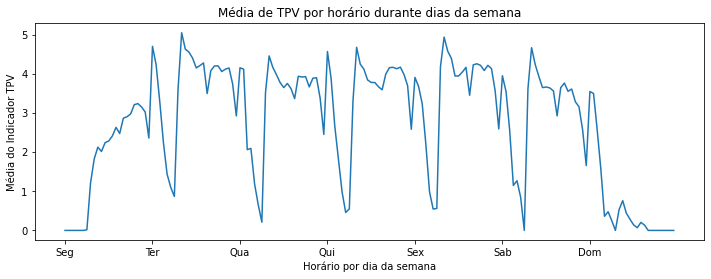

In [67]:
fig, ax = plt.subplots(figsize=(12, 4))

TPV = df_novo.groupby(['dia_semana', 'hora'])['TPV'].mean()
TPV.plot(ax= ax)
_ = ax.set(
    title = "Média de TPV por horário durante dias da semana",
    xticks = [i * 24 for i in range(7)],
    xticklabels = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'],
    xlabel = "Horário por dia da semana",
    ylabel = "Média do Indicador TPV"
)

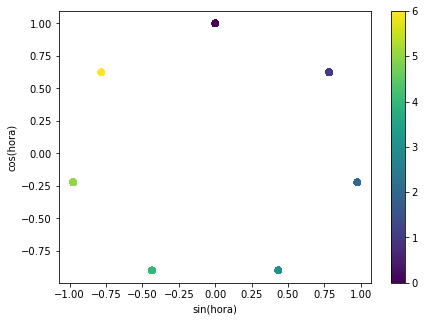

In [121]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(df_novo["dia_semana_sin"], df_novo["dia_semana_cos"], c=df_novo["dia_semana"])
ax.set(
    xlabel="sin(hora)",
    ylabel="cos(hora)",
)
_ = fig.colorbar(sp)

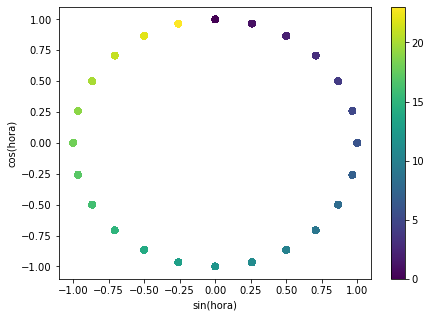

In [112]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(df_novo["hora_sin"], df_novo["hora_cos"], c=df_novo["hora"])
ax.set(
    xlabel="sin(hora)",
    ylabel="cos(hora)",
)
_ = fig.colorbar(sp)

## Exportando a base

In [ ]:
df_novo.reset_index(drop=True, inplace= True)
df_novo.drop(columns= ['tpv_usina'], inplace= True)
df_novo.rename(columns={'tpv_media_acum': 'TPV'}, inplace = True)

In [122]:
df_novo = df_novo[['mes', 
                   'hora_sin',
                   'hora_cos',
                   'dia_semana_sin',
                   'dia_semana_cos',
                   'QTD_VEICULOS_USINA',
                   'primeira_quinzena',
                   'feriado',
                   'fim_semana',
                   'TPV']]
df_novo.replace({True: 1, False: 0}, inplace=True)

display(df_novo.tail(10))
df_novo.info()


C:\Users\thevh\AppData\Local\Temp/ipykernel_28220/1444406432.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo.replace({True: 1, False: 0}, inplace=True)


,mes,hora_sin,hora_cos,dia_semana_sin,dia_semana_cos,QTD_VEICULOS_USINA,primeira_quinzena,feriado,fim_semana,TPV
13030,9,-1.000000,-1.836970e-16,0.433884,-0.900969,17,0,0,0,4.462900
13031,9,-0.965926,2.588190e-01,0.433884,-0.900969,14,0,0,0,4.370166
13032,9,-0.965926,2.588190e-01,0.433884,-0.900969,7,0,0,0,4.356052
13033,9,-0.866025,5.000000e-01,0.433884,-0.900969,6,0,0,0,4.277010
13034,9,-0.866025,5.000000e-01,0.433884,-0.900969,4,0,0,0,4.263278
13035,9,-0.707107,7.071068e-01,0.433884,-0.900969,3,0,0,0,4.306490
13036,9,-0.707107,7.071068e-01,0.433884,-0.900969,3,0,0,0,0.000000
13037,9,-0.500000,8.660254e-01,0.433884,-0.900969,2,0,0,0,4.378044
13038,9,-0.500000,8.660254e-01,0.433884,-0.900969,1,0,0,0,4.419491
13039,9,-0.258819,9.659258e-01,0.433884,-0.900969,0,0,0,0,4.530175


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13040 entries, 0 to 13039
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mes                 13040 non-null  int32  
 1   hora_sin            13040 non-null  float64
 2   hora_cos            13040 non-null  float64
 3   dia_semana_sin      13040 non-null  float64
 4   dia_semana_cos      13040 non-null  float64
 5   QTD_VEICULOS_USINA  13040 non-null  int32  
 6   primeira_quinzena   13040 non-null  int64  
 7   feriado             13040 non-null  int64  
 8   fim_semana          13040 non-null  int64  
 9   TPV                 13040 non-null  float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 917.0 KB


In [ ]:
df_novo.to_csv(r'D:\Dissertação\dissertacao_pgmc\Dados\Dados refinados\timeseries.csv')